## SVM - shorter version

### 1) Generate some data

In [40]:
# Load necessary modules - usually need the 3 below: numpy, pandas and matplotlib
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [41]:
# Try to reproduce the data from R - set the random seed
np.random.seed(1)
d1 = np.random.rand(20)
d2 = np.random.rand(20)

# d1[:5]

In [42]:
# Pack as DataFrame using pandas - not going to work with the plot functions
d_dict = {
    "x1": pd.Series(d1),
    "x2": pd.Series(d2)
}
data = pd.DataFrame(d_dict)
data.shape

(20, 2)

In [43]:
dvals = d_dict.values()
type(dvals)
list(dvals)[1][:5]

0    0.800745
1    0.968262
2    0.313424
3    0.692323
4    0.876389
dtype: float64

### 2) Linear classifier

In [44]:
# Module for SVM
from sklearn import datasets
from sklearn.svm import SVC

In [45]:
# Outcome
y = [-1]*10 + [1]*10
yy = np.array(y)  # turn "y" into a numpy array to allow the subsetting below

X = data
#y1 = np.repeat(0, 10) 
#y2 = np.repeat(1, 10)
#y = np.concatenate([y1, y2])

# Continue to manipulate like in R
X = np.column_stack((d1, d2))
X[:,1][yy==1] = X[:,1][yy==1] + 1

In [46]:
# OR - Use the same data generated in R

X = np.array([[-0.6264538,  0.91897737],
[0.1836433,  0.78213630],
[-0.8356286,  0.07456498],
[1.5952808, -1.98935170],
[0.3295078,  0.61982575],
[-0.8204684, -0.05612874],
[0.4874291, -0.15579551],
[0.7383247, -1.47075238],
[0.5757814, -0.47815006],
[-0.3053884,  0.41794156],
[2.5117812,  2.35867955],
[1.3898432,  0.89721227],
[0.3787594,  1.38767161],
[-1.2146999,  0.94619496],
[2.1249309, -0.37705956],
[0.9550664,  0.58500544],
[0.9838097,  0.60571005],
[1.9438362,  0.94068660],
[1.8212212,  2.10002537],
[1.5939013,  1.76317575]])

In [47]:
# SVM Classifier model - cost for margin violation is C=10
svm_clf = SVC(kernel="linear", C=10.0)  #C=float("inf"))
svm_clf.fit(X, y)

# Repeat the fit with smaller "cost" C=0.1 (results in wider margins)
svm_clf2 = SVC(kernel="linear", C=1)  #C=float("inf"))
svm_clf2.fit(X, y)

SVC(C=1, kernel='linear')

In [48]:
# Plotting function
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)   

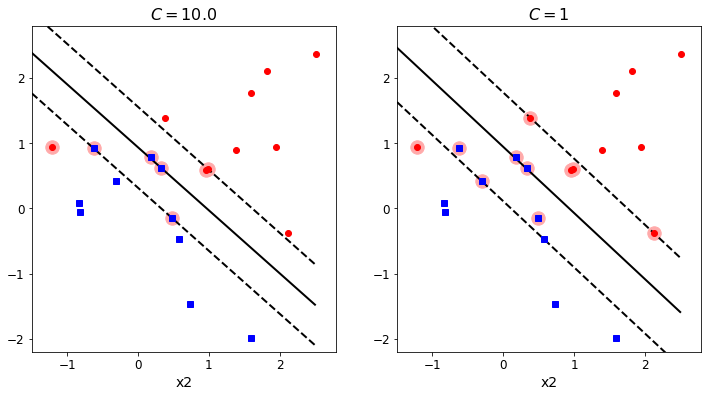

In [49]:
plt.figure(figsize=(12,6))

# Plot for C=10
plt.subplot(121)
plot_svc_decision_boundary(svm_clf, -1.5, 2.5)
plt.plot(X[:, 0][yy==1], X[:, 1][yy==1], "ro")
plt.plot(X[:, 0][yy==-1], X[:, 1][yy==-1], "bs")
plt.title("$C = {}$".format(svm_clf.C), fontsize=16)
plt.xlabel("x1", fontsize=14)
plt.xlabel("x2", fontsize=14)
plt.axis([-1.5, 2.8, -2.2, 2.8])

# Plot for C=1
plt.subplot(122)
plot_svc_decision_boundary(svm_clf2, -1.5, 2.5)
plt.plot(X[:, 0][yy==1], X[:, 1][yy==1], "ro") # "g^"
plt.plot(X[:, 0][yy==-1], X[:, 1][yy==-1], "bs")
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.xlabel("x1", fontsize=14)
plt.xlabel("x2", fontsize=14)
plt.axis([-1.5, 2.8, -2.2, 2.8])

#save_fig("large_margin_classification_plot")
plt.show()

## Nonlinear SVM Classificaiton

One example how it can be implemented using linear SVM is given below

In [50]:
from sklearn.datasets import make_moons
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

X, y = make_moons(n_samples=100, noise=0.15)

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=60, loss="hinge"))
    ])

polynomial_svm_clf.fit(X, y)

/Users/iordan/anaconda3/envs/DSML/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=60, loss='hinge'))])

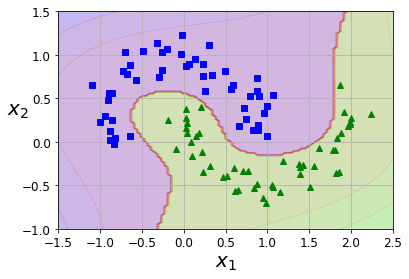

In [51]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

#save_fig("moons_polynomial_svc_plot")
plt.show()

## Another visualization - 3 different kernels

http://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html


In [52]:
print(__doc__)

# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Our dataset and targets
X = np.c_[(.4, -.7),
          (-1.5, -1),
          (-1.4, -.9),
          (-1.3, -1.2),
          (-1.1, -.2),
          (-1.2, -.4),
          (-.5, 1.2),
          (-1.5, 2.1),
          (1, 1),
          # --
          (1.3, .8),
          (1.2, .5),
          (.2, -2),
          (.5, -2.4),
          (.2, -2.3),
          (0, -2.7),
          (1.3, 2.1)].T
Y = [0] * 8 + [1] * 8

Automatically created module for IPython interactive environment


In [53]:
X.shape

(16, 2)

<ipython-input-78-bb451026a8c9>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axes[i].pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
<ipython-input-78-bb451026a8c9>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axes[i].pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
<ipython-input-78-bb451026a8c9>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadri

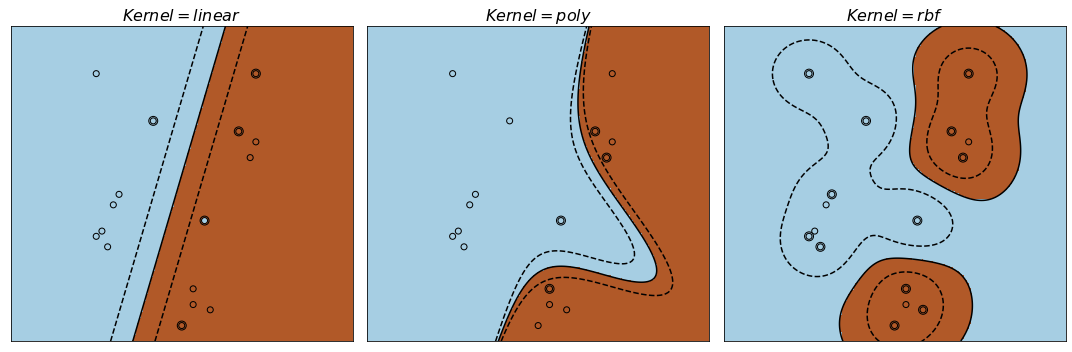

In [78]:
# Display decision boundaries for 3 kernels

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flat

lst = ('linear', 'poly', 'rbf')

for i, kernel in zip(range(len(lst)), lst):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', zorder=10, edgecolors='k')
    axes[i].scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')

    x_min = -3; x_max = 3
    y_min = -3; y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    axes[i].set_title("$Kernel = {}$".format(kernel), fontsize=16)
    
    axes[i].pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    axes[i].contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)

    axes[i].set_xticks(())
    axes[i].set_yticks(())
        
plt.tight_layout()       